In [2]:
import csv

# Chemin du fichier
file_path = "Dataset_Init.csv"

# Les titres que vous souhaitez ajouter
headers = ["target", "ids", "date", "flag", "user", "text"]

# Lire les données existantes
with open(file_path, "r", encoding="utf-8") as file:
    data = file.readlines()

# Écrire les titres et ajouter les anciennes données
with open(file_path, "w", encoding="utf-8") as file:
    # Ajouter les titres
    file.write(",".join(headers) + "\n")
    # Ajouter les anciennes données
    file.writelines(data)

In [3]:
import pandas as pd

# Charger le fichier CSV dans un DataFrame
df = pd.read_csv('Dataset_Init.csv')

# Sélectionner 20 lignes aléatoires
random_rows = df.sample(n=20)

# Afficher les lignes sélectionnées
display(random_rows)

,target,ids,date,flag,user,text
875739,4,1680848782,Sat May 02 12:38:14 PDT 2009,NO_QUERY,xniffyx,@JediMistySpice I got your package!!! OMG than...
266146,0,1988938452,Sun May 31 23:49:52 PDT 2009,NO_QUERY,jiggawoot,Finally home after a bloody long day at work. ...
427736,0,2063791417,Sun Jun 07 04:05:22 PDT 2009,NO_QUERY,dominickmoya,Awww. I lost 3 followers. Got a full bottle o...
957436,4,1825461178,Sun May 17 05:46:58 PDT 2009,NO_QUERY,jodiess,@spencerpratt can I get Heidis #???
1485065,4,2067798005,Sun Jun 07 12:58:47 PDT 2009,NO_QUERY,ucfree,Let's see if I can get out for some Macys shop...
656344,0,2240411260,Fri Jun 19 09:42:50 PDT 2009,NO_QUERY,sk8rfish,@eman1110 I wish I could fall asleep that quic...
1040466,4,1956952937,Thu May 28 23:06:56 PDT 2009,NO_QUERY,Isaaatje,@petteflet lol you are right. i have mixed you...
1514276,4,2175459085,Mon Jun 15 01:02:44 PDT 2009,NO_QUERY,deKay01,"@ahrenfelt Yes, but what about those left glui..."
593776,0,2218327147,Wed Jun 17 22:16:48 PDT 2009,NO_QUERY,clubbeats_blog,"Now time to eat, more drinks and more gambling..."
1385191,4,2052726912,Sat Jun 06 01:47:15 PDT 2009,NO_QUERY,JORdashEL,My night = better than the love pentagon's ni...


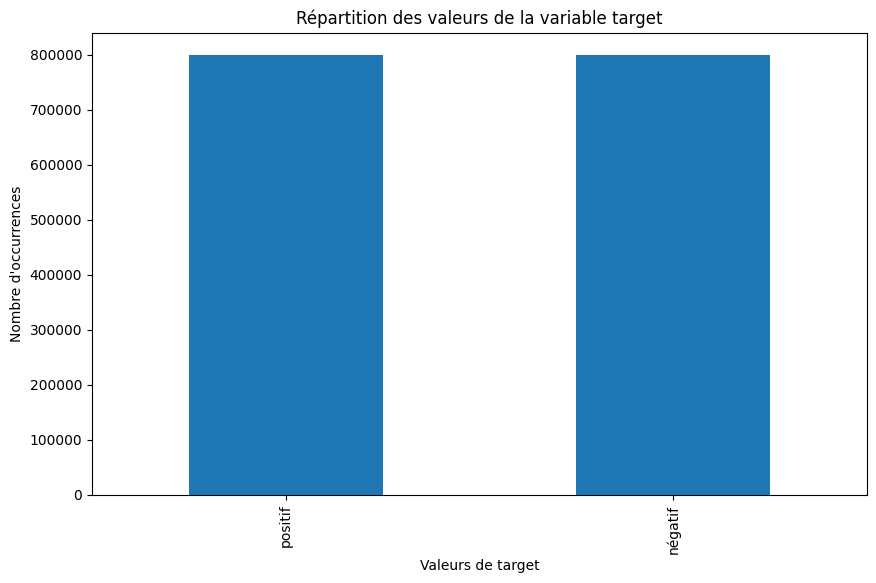

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

# Supposons que vous avez un DataFrame pandas nommé df avec une colonne 'target'
df = pd.read_csv('Dataset_Init.csv')

# Compter les occurrences de chaque valeur dans la colonne 'target'
target_counts = df['target'].value_counts()

# Créer un graphique à barres
plt.figure(figsize=(10, 6))
ax = target_counts.plot(kind='bar')
plt.title('Répartition des valeurs de la variable target')
plt.xlabel('Valeurs de target')
plt.ylabel('Nombre d\'occurrences')

# Modifier les noms des colonnes en abscisse
ax.set_xticklabels(['positif', 'négatif'])

plt.show()

In [2]:
import pandas as pd

# Charger le fichier CSV dans un DataFrame
df = pd.read_csv('Dataset_Init.csv')

# Afficher les statistiques descriptives
display(df.describe(include='all'))

# Afficher les valeurs manquantes
display(df.isnull().sum())


,target,ids,date,flag,user,text
count,1.600000e+06,1.600000e+06,1600000,1600000,1600000,1600000
unique,NaN,NaN,774363,1,659775,1581466
top,NaN,NaN,Mon Jun 15 12:53:14 PDT 2009,NO_QUERY,lost_dog,isPlayer Has Died! Sorry
freq,NaN,NaN,20,1600000,549,210
mean,2.000000e+00,1.998818e+09,NaN,NaN,NaN,NaN
std,2.000001e+00,1.935761e+08,NaN,NaN,NaN,NaN
min,0.000000e+00,1.467810e+09,NaN,NaN,NaN,NaN
25%,0.000000e+00,1.956916e+09,NaN,NaN,NaN,NaN
50%,2.000000e+00,2.002102e+09,NaN,NaN,NaN,NaN
75%,4.000000e+00,2.177059e+09,NaN,NaN,NaN,NaN


target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64